# Merge E, V into one object

## Set up correct conda environment


In [1]:
.libPaths('/home/groups/tttt/xjluo/miniconda3/envs/single_cell_Seurat_v5/lib/R/library')
.libPaths()

[1] "/home/groups/tttt/xjluo/miniconda3/envs/single_cell_Seurat_v5/lib/R/library"
[2] "/home/users/xjluo/miniconda3/envs/jupyter_env/lib/R/library"

## Load packages

In [2]:
library(tidyverse)
library(viridis)
library(Seurat)
library(Signac)
library(Azimuth)
library(EnsDb.Mmusculus.v79)
library(BSgenome.Mmusculus.UCSC.mm10)
library(ggpointdensity)
library(ggExtra)

set.seed(1234)
options(repr.matrix.max.cols=100, repr.matrix.max.rows=50)
options(warn=-1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: viridisLite

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



Attaching shinyBS

Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following ob

In [3]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/users/xjluo/miniconda3/envs/jupyter_env/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Los_Angeles
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggExtra_0.10.1                     ggpointdensity_0.1.0              
 [3] BSgenome.Mmusculus.UCSC.mm10_1.4.3 BSgenome_1.68.0                   
 [5] rtracklayer_1.60.1                 Bi

In [4]:
sample1 <- 'E2'
sample2 <- 'V'

## STEP 0: Paths

In [5]:
data_master_dir <- '/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC'

data_master_dir

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC"

In [6]:
# E2
E.path <- paste0(data_master_dir, '/xjluo_analysis/step1_qc/ATAC/2_filtered_objects/', sample1, ".ATAC.filtered.Seurat.v5.rds")

E.path

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/xjluo_analysis/step1_qc/ATAC/2_filtered_objects/E2.ATAC.filtered.Seurat.v5.rds"

In [7]:
# V
V.path <- paste0(data_master_dir, '/xjluo_analysis/step1_qc/ATAC/2_filtered_objects/', sample2, ".ATAC.filtered.Seurat.v5.rds")

V.path

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/xjluo_analysis/step1_qc/ATAC/2_filtered_objects/V.ATAC.filtered.Seurat.v5.rds"

In [8]:
# peaks
macs3_output_dir <- '/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/xjluo_analysis/step1_qc/ATAC/macs3_outputs'

macs3_output_dir

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/xjluo_analysis/step1_qc/ATAC/macs3_outputs"

In [9]:
merge_savedir <- paste0(data_master_dir, '/xjluo_analysis/step2_merge')

merge_savedir

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/xjluo_analysis/step2_merge"

## STEP 1: Load objects

In [10]:
E.atac.obj <- readRDS(E.path)

In [11]:
V.atac.obj <- readRDS(V.path)

In [12]:
E.atac.obj

An object of class Seurat 
275370 features across 2668 samples within 1 assay 
Active assay: ATAC (275370 features, 275370 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: lsi, umap

In [13]:
V.atac.obj

An object of class Seurat 
294170 features across 2245 samples within 1 assay 
Active assay: ATAC (294170 features, 294170 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: lsi, umap

### STEP 1.1 Check object contents

In [14]:
head(E.atac.obj@meta.data)
dim(E.atac.obj@meta.data)
colnames(E.atac.obj@meta.data)

,orig.ident,nCount_ATAC,nFeature_ATAC,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,ATAC_snn_res.1.2,seurat_clusters
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
AAACGAAAGCATTCCA-1,SeuratProject,13124,10703,0.3401432,0.42,4.097908,0.44,3,3
AAACGAACAACGACAG-1,SeuratProject,11977,9383,0.3016312,0.13,4.861805,0.72,0,0
AAACGAACACAGCTTA-1,SeuratProject,11062,8913,0.4078465,0.83,3.824588,0.32,4,4
AAACGAAGTACCTATG-1,SeuratProject,11298,9280,0.3342499,0.36,5.069333,0.78,0,0
AAACGAATCCGTGCAG-1,SeuratProject,14580,11592,0.3333333,0.36,4.896320,0.73,0,0
AAACGAATCGGAGTTT-1,SeuratProject,12648,10412,0.3392019,0.41,3.728090,0.27,4,4


[1] 2668    9

[1] "orig.ident"            "nCount_ATAC"           "nFeature_ATAC"        
[4] "nucleosome_signal"     "nucleosome_percentile" "TSS.enrichment"       
[7] "TSS.percentile"        "ATAC_snn_res.1.2"      "seurat_clusters"

In [15]:
head(V.atac.obj@meta.data)
dim(V.atac.obj@meta.data)
colnames(V.atac.obj@meta.data)

,orig.ident,nCount_ATAC,nFeature_ATAC,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,ATAC_snn_res.1.2,seurat_clusters
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
AAACGAAGTGAGCTAG-1,SeuratProject,18832,13831,0.3936928,0.24,4.337298,0.54,0,0
AAACGAATCAGTGTAC-1,SeuratProject,18643,13333,0.4229897,0.46,4.281897,0.52,4,4
AAACGAATCCATCATT-1,SeuratProject,15443,11862,0.4257565,0.48,5.054576,0.78,2,2
AAACGAATCTGGAAGG-1,SeuratProject,19693,15887,0.6212412,0.96,3.736481,0.26,0,0
AAACTCGAGAGATTAC-1,SeuratProject,17118,12675,0.5088781,0.83,4.054011,0.41,5,5
AAACTCGAGGCGTCCT-1,SeuratProject,23399,16399,0.3714031,0.12,3.841182,0.30,4,4


[1] 2245    9

[1] "orig.ident"            "nCount_ATAC"           "nFeature_ATAC"        
[4] "nucleosome_signal"     "nucleosome_percentile" "TSS.enrichment"       
[7] "TSS.percentile"        "ATAC_snn_res.1.2"      "seurat_clusters"

In [16]:
dim(GetAssayData(E.atac.obj, assay = 'ATAC', slot = 'data'))

[1] 275370   2668

In [17]:
dim(GetAssayData(V.atac.obj, assay = 'ATAC', slot = 'data'))

[1] 294170   2245

### Plots

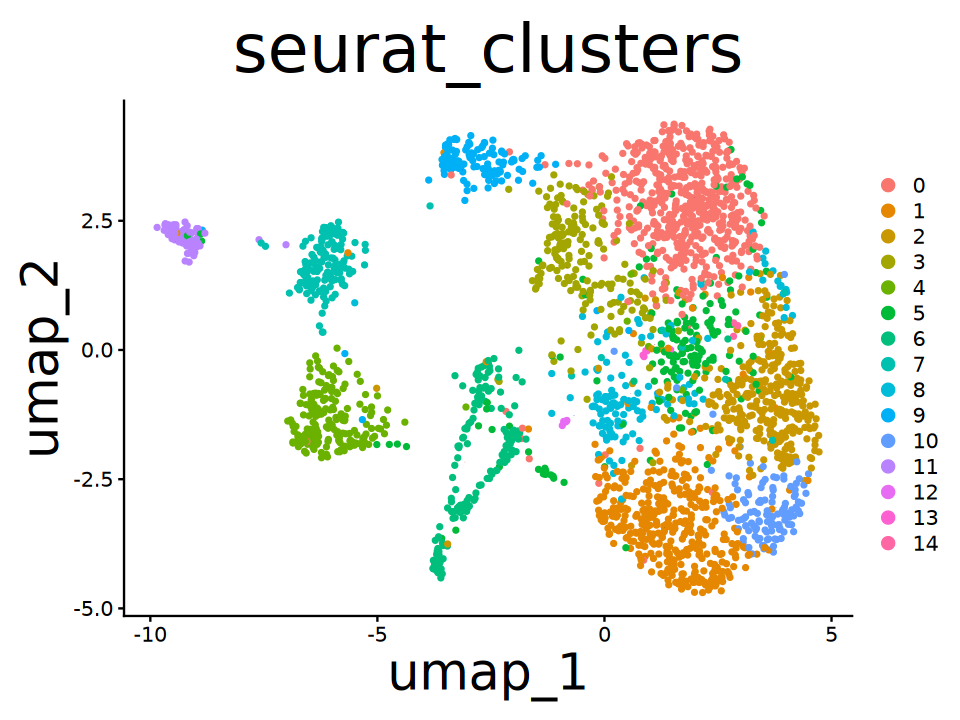

In [18]:
options(repr.plot.width=8, repr.plot.height=6)

DimPlot(E.atac.obj, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'seurat_clusters', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

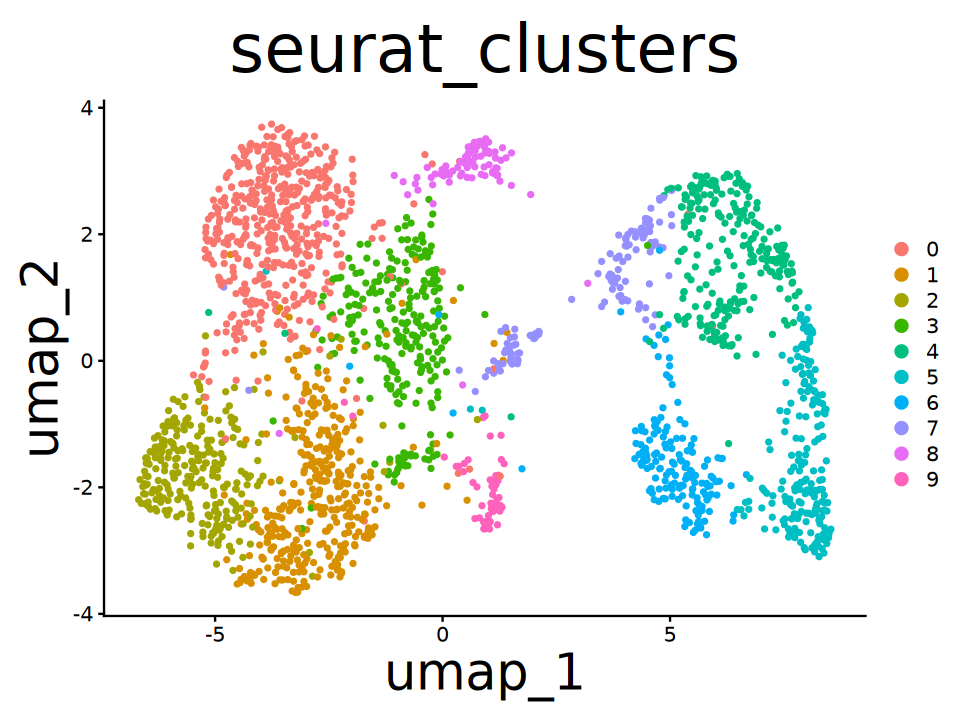

In [19]:
options(repr.plot.width=8, repr.plot.height=6)

DimPlot(V.atac.obj, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'seurat_clusters', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

In [20]:
head(Cells(E.atac.obj))
tail(Cells(E.atac.obj))
     

[1] "AAACGAAAGCATTCCA-1" "AAACGAACAACGACAG-1" "AAACGAACACAGCTTA-1"
[4] "AAACGAAGTACCTATG-1" "AAACGAATCCGTGCAG-1" "AAACGAATCGGAGTTT-1"

[1] "TTTGGTTAGGAATGGA-1" "TTTGGTTGTACGTAAA-1" "TTTGGTTTCCCGAAGC-1"
[4] "TTTGTGTAGACTCGGA-1" "TTTGTGTAGGAACCGT-1" "TTTGTGTGTCTGGTTA-1"

In [21]:
head(Cells(V.atac.obj))
tail(Cells(V.atac.obj))
     

[1] "AAACGAAGTGAGCTAG-1" "AAACGAATCAGTGTAC-1" "AAACGAATCCATCATT-1"
[4] "AAACGAATCTGGAAGG-1" "AAACTCGAGAGATTAC-1" "AAACTCGAGGCGTCCT-1"

[1] "TTTGTGTAGAATAGTC-1" "TTTGTGTAGGTGTCGA-1" "TTTGTGTCAGAGCCAA-1"
[4] "TTTGTGTGTAAGTGCG-1" "TTTGTGTGTATCATGC-1" "TTTGTGTTCTCTGTTA-1"

## STEP 2: Combine E and V into one object

In [22]:
library(future)

plan("multicore", workers = 4)
options(future.globals.maxSize = 50000 * 2 * 1024^2) # for 50 Gb RAM


Attaching package: 'future'


The following object is masked from 'package:AnnotationFilter':

    value




### Step 2.1: get combined peak set

In [23]:
e_peaks <- paste0(macs3_output_dir, '/', sample1, '/SeuratProject_peaks.narrowPeak')
v_peaks <- paste0(macs3_output_dir, '/', sample2, '/SeuratProject_peaks.narrowPeak')

e_peaks
v_peaks

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/xjluo_analysis/step1_qc/ATAC/macs3_outputs/E2/SeuratProject_peaks.narrowPeak"

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/xjluo_analysis/step1_qc/ATAC/macs3_outputs/V/SeuratProject_peaks.narrowPeak"

In [24]:
# read in peak sets
peaks.e <- read.table(
  file = e_peaks,
  col.names = c("chr", "start", "end", "name",
                "score", "strand", "fold_change",
                "neg_log10pvalue_summit", "neg_log10qvalue_summit",
                "relative_summit_position")
)
peaks.v <- read.table(
  file = v_peaks,
  col.names = c("chr", "start", "end", "name",
                "score", "strand", "fold_change",
                "neg_log10pvalue_summit", "neg_log10qvalue_summit",
                "relative_summit_position")
)

# convert to genomic ranges
gr.e <- makeGRangesFromDataFrame(peaks.e, starts.in.df.are.0based=TRUE)
gr.v <- makeGRangesFromDataFrame(peaks.v, starts.in.df.are.0based=TRUE)

# Create a unified set of peaks to quantify in each dataset
combined.peaks <- reduce(x = c(gr.e, gr.v))

# Filter out bad peaks based on length
peakwidths <- width(combined.peaks)
combined.peaks <- combined.peaks[peakwidths < 1500 & peakwidths > 25]


# remove peaks on nonstandard chromosomes and in genomic blacklist regions
combined.peaks <- keepStandardChromosomes(combined.peaks, pruning.mode = "coarse")
combined.peaks <- subsetByOverlaps(x = combined.peaks, ranges=blacklist_mm10, invert=TRUE)

combined.peaks

GRanges object with 313473 ranges and 0 metadata columns:
           seqnames              ranges strand
              <Rle>           <IRanges>  <Rle>
       [1]     chr1     3113057-3113958      *
       [2]     chr1     3114013-3114245      *
       [3]     chr1     3118870-3119029      *
       [4]     chr1     3119037-3119445      *
       [5]     chr1     3121248-3122222      *
       ...      ...                 ...    ...
  [313469]     chrX 169880353-169880615      *
  [313470]     chrX 169880958-169881120      *
  [313471]     chrX 169883442-169883677      *
  [313472]     chrX 169927421-169927593      *
  [313473]     chrX 169946454-169946626      *
  -------
  seqinfo: 21 sequences from an unspecified genome; no seqlengths

### Step 2.2: create fragments objects

In [25]:
# Data
frag_file.e <- paste0(data_master_dir, '/', sample1, '/outs/', 'fragments.tsv.gz')
frag_file.v <- paste0(data_master_dir, '/', sample2, '/outs/', 'fragments.tsv.gz')

frag_file.e
frag_file.v

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/E2/outs/fragments.tsv.gz"

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/V/outs/fragments.tsv.gz"

In [26]:
# create fragment objects

frags.e <- CreateFragmentObject(
  path = frag_file.e,
  cells = Cells(E.atac.obj)
)

frags.e

Computing hash



A Fragment object for 2668 cells

In [27]:
frags.v <- CreateFragmentObject(
  path = frag_file.v,
  cells = Cells(V.atac.obj)
)

frags.v

Computing hash



A Fragment object for 2245 cells

## Step 3: get FeatureMatrix using consensus peak set

In [28]:
e.counts <- FeatureMatrix(
  fragments = frags.e,
  features = combined.peaks,
  cells = Cells(E.atac.obj)
)

v.counts <- FeatureMatrix(
  fragments = frags.v,
  features = combined.peaks,
  cells = Cells(V.atac.obj)
)

Extracting reads overlapping genomic regions

Extracting reads overlapping genomic regions



## Step 4: Create Seurat objects per dataset (E, V)

In [29]:
e_assay <- CreateChromatinAssay(e.counts, fragments = frags.e)
e.obj.consensus <- CreateSeuratObject(e_assay, assay = "ATAC", meta.data=E.atac.obj@meta.data)

v_assay <- CreateChromatinAssay(v.counts, fragments = frags.v)
v.obj.consensus <- CreateSeuratObject(v_assay, assay = "ATAC", meta.data=V.atac.obj@meta.data)

## Step 5: Merge objects

In [30]:
# add information to identify dataset of origin
e.obj.consensus$dataset <- 'e'
v.obj.consensus$dataset <- 'v'

# merge all datasets, adding a cell ID to make sure cell names are unique
all.combined <- merge(
  x = e.obj.consensus,
  y = list(v.obj.consensus),
  add.cell.ids = c("E", "V")
)

all.combined[["ATAC"]]

ChromatinAssay data with 313473 features for 4913 cells
Variable features: 0 
Genome: 
Annotation present: FALSE 
Motifs present: FALSE 
Fragment files: 2 

## Step 6: check merged object

In [31]:
all.combined <- RunTFIDF(all.combined)
all.combined <- FindTopFeatures(all.combined, min.cutoff = 20)
all.combined <- RunSVD(all.combined)
all.combined <- RunUMAP(all.combined, dims = 2:50, reduction = 'lsi')

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

10:45:14 UMAP embedding parameters a = 0.9922 b = 1.112

10:45:14 Read 4913 rows and found 49 numeric columns

10:45:14 Using Annoy for neighbor search, n_neighbors = 30

10:45:14 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:45:15 Writing NN index file to temp file /tmp/RtmpRVV3Oq/file2da31d532b7f

10:45:15 Searching Annoy index using 4 threads, search_k = 3000

10:45:15 Annoy recall = 100%

10:45:16 Commencing smooth kNN distance calibration using 4 threads
 with target n_neighbors = 30

10:45:19 Initializing from normalized Laplacian + noise (using RSpectra)

10:45:19 Commencing optimization for 500 epochs, with 208080 positive edges

10:45:35 Optimization finished



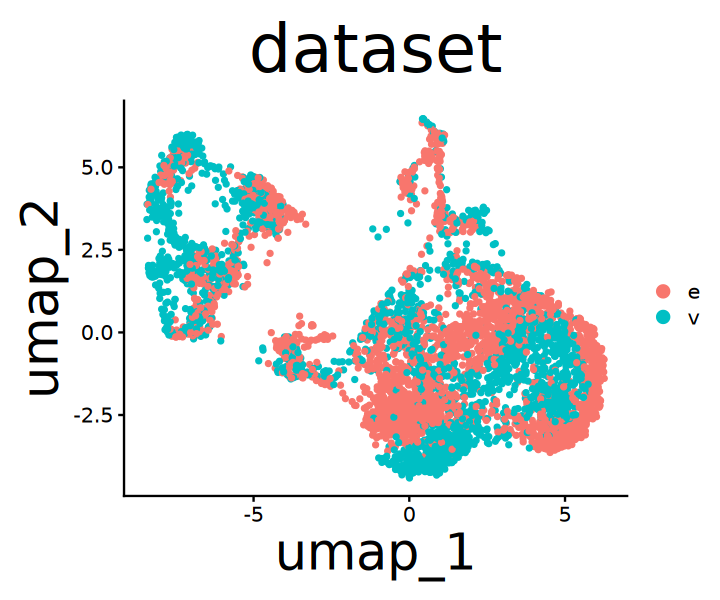

In [32]:
options(repr.plot.width=6, repr.plot.height=5)

DimPlot(all.combined, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'dataset', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

In [33]:
head(Cells(all.combined))
tail(Cells(all.combined))

[1] "E_AAACGAAAGCATTCCA-1" "E_AAACGAACAACGACAG-1" "E_AAACGAACACAGCTTA-1"
[4] "E_AAACGAAGTACCTATG-1" "E_AAACGAATCCGTGCAG-1" "E_AAACGAATCGGAGTTT-1"

[1] "V_TTTGTGTAGAATAGTC-1" "V_TTTGTGTAGGTGTCGA-1" "V_TTTGTGTCAGAGCCAA-1"
[4] "V_TTTGTGTGTAAGTGCG-1" "V_TTTGTGTGTATCATGC-1" "V_TTTGTGTTCTCTGTTA-1"

In [34]:
head(all.combined@meta.data)
dim(all.combined@meta.data)

,orig.ident,nCount_ATAC,nFeature_ATAC,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,ATAC_snn_res.1.2,seurat_clusters,dataset
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
E_AAACGAAAGCATTCCA-1,SeuratProject,6979,6416,0.3401432,0.42,4.097908,0.44,3,3,e
E_AAACGAACAACGACAG-1,SeuratProject,5660,4971,0.3016312,0.13,4.861805,0.72,0,0,e
E_AAACGAACACAGCTTA-1,SeuratProject,5707,5162,0.4078465,0.83,3.824588,0.32,4,4,e
E_AAACGAAGTACCTATG-1,SeuratProject,5502,5033,0.3342499,0.36,5.069333,0.78,0,0,e
E_AAACGAATCCGTGCAG-1,SeuratProject,6674,6215,0.3333333,0.36,4.896320,0.73,0,0,e
E_AAACGAATCGGAGTTT-1,SeuratProject,6360,5928,0.3392019,0.41,3.728090,0.27,4,4,e


[1] 4913   10

## STEP 7: Save merged object

In [35]:
all.combined

An object of class Seurat 
313473 features across 4913 samples within 1 assay 
Active assay: ATAC (313473 features, 313469 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: lsi, umap

In [36]:
Version(all.combined)

[1] '5.0.2'

In [37]:
save_path <- paste0(merge_savedir, '/E_V/', sample1, '_', sample2, '_', 'merged.rds')

save_path

[1] "/oak/stanford/groups/tttt/collaboration/jin/240613_ATAC/xjluo_analysis/step2_merge/E_V/E2_V_merged.rds"

In [38]:
saveRDS(all.combined, file = save_path)

print('Done')

[1] "Done"


# END